## SCS_3251_003: Statistics for Data Science
#### <font color ='blue'>Term Project - Analysis of Kaggle Machine Learning Survey 2017 Data</font>

###### Step 1: Import all required libraries and declare constants

In [ ]:
#Import all required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbr
import statsmodels.api as sm
sbr.set(color_codes=True)

# Set matplotlib params
%matplotlib inline
plt.rcParams['font.family'] = 'Calibri'
headerFontSize = 20
subHeaderFontSize = 13
alpha = 0.8
palette = 'muted'

# Supress pandas warnings 
pd.options.mode.chained_assignment = None

# Folder Paths
inputFolderPath = 'C:\\Users\\clockwork\\Documents\\UofT - Fundamentals of Data Science\\SCS_3251 - Statistics\\Term Project\\kaggle-survey-2017\\'
outputFolderPath = 'C:\\Users\\clockwork\\Documents\\UofT - Fundamentals of Data Science\\SCS_3251 - Statistics\\Term Project\\outputs\\'

###### Step 2: Read in the data and do some data pre-processing

In [ ]:
# Read in the data
allMCQData = pd.read_csv((inputFolderPath + 'multipleChoiceResponses.csv'), encoding="ISO-8859-1")
#allMCQData = pd.read_csv("C:\\SV_Projects\\KSurv\\multipleChoiceResponses.csv", encoding="ISO-8859-1")
# Add a few extra columns
# (1) Gender: change long values to 'Other'
allMCQData['Gender'] = np.where(np.logical_or(allMCQData['GenderSelect'] == 'Male', 
                                              allMCQData['GenderSelect'] == 'Female'),
                                allMCQData['GenderSelect'], 'Other') 

# (2) FormalEducation_Mod: shorten longer values in 'FormalEducation'
allMCQData['FormalEducation_Mod'] = allMCQData['FormalEducation']
allMCQData['FormalEducation_Mod'] = allMCQData['FormalEducation_Mod'].replace(to_replace = ['Master\'s degree',
                                                                                            'Bachelor\'s degree',
                                                                                            'Doctoral degree',
                                                                                            'Some college/university study without earning a bachelor\'s degree',
                                                                                            'Professional degree',
                                                                                            'I did not complete any formal education past high school',
                                                                                            'I prefer not to answer'],
                                                                             value=['Master\'s degree',
                                                                                    'Bachelor\'s degree',
                                                                                    'Doctoral degree',
                                                                                    'No Bachelor\'s',
                                                                                    'Professional degree',
                                                                                    'High School',
                                                                                    'No Answer'])

# (2) MajorSelected_Mod: shorten longer values in 'FormalEducation'
allMCQData['MajorSelected_Mod'] = allMCQData['MajorSelect'] 
allMCQData['MajorSelected_Mod'] = allMCQData['MajorSelected_Mod'].replace(to_replace = ['Computer Science',
                                                                                        'Mathematics or statistics',
                                                                                        'Engineering (non-computer focused)',
                                                                                        'Electrical Engineering',
                                                                                        'Other',
                                                                                        'Physics',
                                                                                        'Information technology, networking, or system administration',
                                                                                        'A social science',
                                                                                        'Biology',
                                                                                        'Management information systems',
                                                                                        'A humanities discipline',
                                                                                        'A health science',
                                                                                        'Psychology',
                                                                                        'I never declared a major',
                                                                                        'Fine arts or performing arts'],
                                                                         value = ['Comp. Sci.',
                                                                                    'Math/Stats',
                                                                                    'Engg.(non-CompSci.)',
                                                                                    'Elec. Engg.',
                                                                                    'Other',
                                                                                    'Physics',
                                                                                    'IT/Ntwrk./Sys Admin',
                                                                                    'Social Sci.',
                                                                                    'Biology',
                                                                                    'Mgmt. Info. Sys.',
                                                                                    'Humanities',
                                                                                    'Health Sci.',
                                                                                    'Psychology',
                                                                                    'Undeclared',
                                                                                    'Arts'])

# (4) Country: replace longer versions of country names with a shorter version
# for better display on charts
allMCQData['Country'] = allMCQData['Country'].replace(to_replace = ['United States',
                                            'United Kingdom',
                                            'People \'s Republic of China'],
                             value=['USA',
                                   'UK',
                                   'China'])

# (5) Add a numerical representation for R and Python usage levels
allMCQData['RUsageLevel'] = allMCQData['WorkToolsFrequencyR'].fillna(0)
allMCQData['PythonUsageLevel'] = allMCQData['WorkToolsFrequencyPython'].fillna(0)
allMCQData['RUsageLevel'].replace(to_replace=['Most of the time', 
                                               'Often',
                                               'Sometimes',
                                               'Rarely'],
                                   value=[4,3,2,1],
                                   inplace=True)

allMCQData['PythonUsageLevel'].replace(to_replace=['Most of the time', 
                                               'Often',
                                               'Sometimes',
                                               'Rarely'],
                                   value=[4,3,2,1],
                                   inplace=True)

allMCQData['R_OR_PY'] = np.where(np.logical_and(allMCQData['PythonUsageLevel'] > allMCQData['RUsageLevel'],
                                                   allMCQData['PythonUsageLevel'] > 2),
                                                     'Python',
                                np.where(np.logical_and(allMCQData['RUsageLevel'] > allMCQData['PythonUsageLevel'], 
                                                allMCQData['RUsageLevel'] > 2), 'R',
                                         np.where(np.logical_and(allMCQData['PythonUsageLevel'] == allMCQData['RUsageLevel'],
                                                   allMCQData['PythonUsageLevel'] > 2),
                                                     'Both','Neither')))
                                 
# Copy Canadian responses to another dataset for easy retrieval
mcqDataCanada = allMCQData[allMCQData['Country'] == 'Canada']

##### Step 4: Examine the demographic profile of the survey respondents

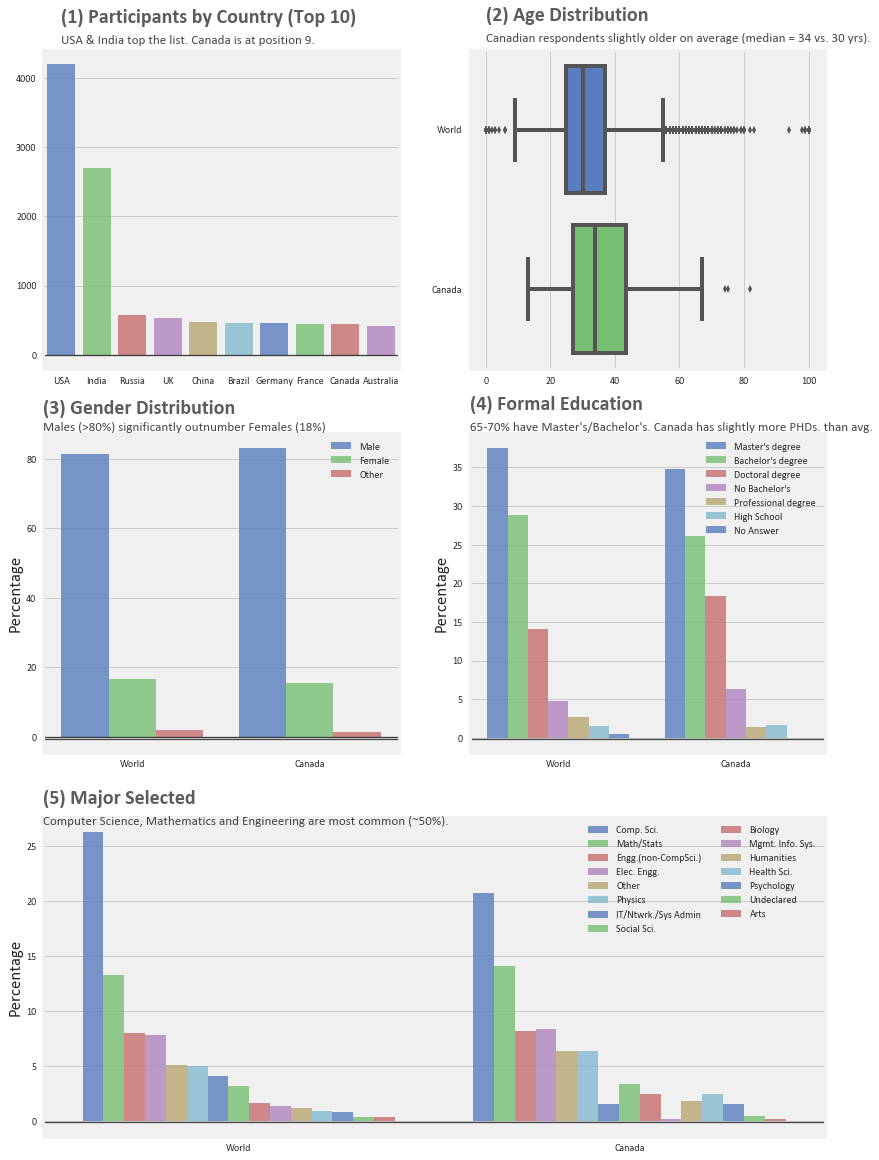

In [3]:
# Graph the following:
# (1) Participant counts by country
# (2) Age summary for World and Canada
# (3) Gender summary for World and Canada
# (4) Formal Education
fig = plt.figure(figsize=(14,20))
plt.style.use('fivethirtyeight')
rowCount = 3
colCount = 2

# (1) Participant counts by country
ax1 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,0), colspan=1)
ax1 = sbr.barplot(x=allMCQData[allMCQData['Country'] != 'Other']['Country'].value_counts()[0:10].index, 
                  y=allMCQData[allMCQData['Country'] != 'Other']['Country'].value_counts()[0:10].values,
                 palette=palette,
                 alpha = alpha)
ax1.axhline(y=-1, color = 'black', linewidth = 1.3, alpha = 0.7)
ax1.text(x=0,y=4800,s='(1) Participants by Country (Top 10)',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax1.text(x=0,y=4500,s='USA & India top the list. Canada is at position 9.', fontsize = subHeaderFontSize, alpha = .85)


# (2) Age summary for World and Canada
ax2 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,1), colspan=1, rowspan=1)
ax2 = sbr.boxplot(y = ['World', 'Canada'], 
                  x=[allMCQData['Age'].dropna(), 
                     mcqDataCanada['Age'].dropna()], 
                    orient='h',
                 palette=palette)
ax2.text(x=0,y=-0.68,s='(2) Age Distribution',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax2.text(x=0,y=-0.55,s='Canadian respondents slightly older on average (median = 34 vs. 30 yrs).', fontsize = subHeaderFontSize, alpha = .85)

# (3) Gender summary for World and Canada
genderSummary = (allMCQData['Gender'].value_counts()*100/len(allMCQData)).append(mcqDataCanada['Gender'].value_counts()*100/len(mcqDataCanada))
genderSummary = pd.DataFrame(genderSummary).reset_index()
genderSummary.columns = ['Gender', 'Percentage']
genderSummary['Area'] = ['World']*3 + ['Canada']*3
ax3 = plt.subplot2grid(shape=(rowCount, colCount), loc=(1,0), colspan=1, rowspan=1)
ax3 = sbr.barplot(data=genderSummary,
                  x='Area',
                  y='Percentage',
                 hue='Gender',
                 palette=palette,
                 alpha = alpha)
ax3.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
ax3.legend(loc='upper right')
ax3.set_ylabel('Percentage')
ax3.xaxis.label.set_visible(False)
ax3.text(x=-0.5,y=93,s='(3) Gender Distribution',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax3.text(x=-0.5,y=88,s='Males (>80%) significantly outnumber Females (18%)', fontsize = subHeaderFontSize, alpha = .85)
ax3.axhline(y=-0.5, color = 'black', linewidth = 1.3, alpha = 0.7)


# (4) Formal Education for World and Canada
formalEduSummary = (allMCQData['FormalEducation_Mod'].value_counts()*100/len(allMCQData)).append(mcqDataCanada['FormalEducation_Mod'].value_counts()*100/len(mcqDataCanada))
formalEduSummary = pd.DataFrame(formalEduSummary).reset_index()
formalEduSummary.columns = ['FormalEducation_Mod', 'Percentage']
formalEduSummary['Area'] = ['World']*len(allMCQData['FormalEducation_Mod'].value_counts()) + ['Canada']*len(mcqDataCanada['FormalEducation_Mod'].value_counts())
ax4 = plt.subplot2grid(shape=(rowCount, colCount), loc=(1,1), colspan=1, rowspan=1)
ax4 = sbr.barplot(data=formalEduSummary,
                     x='Area',
                     y='Percentage',
                     hue='FormalEducation_Mod',
                    palette=palette,
                 alpha = alpha)
ax4.legend(loc='upper right')
ax4.set_ylabel('Percentage')
ax4.xaxis.label.set_visible(False)
ax4.text(x=-0.5,y=42.5,s='(4) Formal Education',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax4.text(x=-0.5,y=39.7,s='65-70% have Master\'s/Bachelor\'s. Canada has slightly more PHDs. than avg.', fontsize = subHeaderFontSize, alpha = .85)
ax4.axhline(y=-0.1, color = 'black', linewidth = 1.3, alpha = 0.7)

# (5) Major Selected for World and Canada
majorSelectedSummary = (allMCQData['MajorSelected_Mod'].value_counts()*100/len(allMCQData)).append(mcqDataCanada['MajorSelected_Mod'].value_counts()*100/len(mcqDataCanada))
majorSelectedSummary = pd.DataFrame(majorSelectedSummary).reset_index()
majorSelectedSummary.columns = ['MajorSelected_Mod', 'Percentage']
majorSelectedSummary['Area'] = ['World']*len(allMCQData['MajorSelected_Mod'].value_counts()) + ['Canada']*len(mcqDataCanada['MajorSelected_Mod'].value_counts())
majorSelectedSummary
ax5 = plt.subplot2grid(shape=(rowCount, colCount), loc=(2,0), colspan=2, rowspan=1)
ax5 = sbr.barplot(data=majorSelectedSummary,
                     x='Area',
                     y='Percentage',
                     hue='MajorSelected_Mod',
                    palette=palette,
                 alpha = alpha)
ax5.legend(loc='upper right', ncol=2)
ax5.set_ylabel('Percentage')
ax5.xaxis.label.set_visible(False)
ax5.text(x=-0.5,y=28.8,s='(5) Major Selected',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax5.text(x=-0.5,y=26.9,s='Computer Science, Mathematics and Engineering are most common (~50%).', fontsize = subHeaderFontSize, alpha = .85)
ax5.axhline(y=-0.1, color = 'black', linewidth = 1.3, alpha = 0.7)

plt.show()

fig.savefig(outputFolderPath + 'demog_plot.png')

##### Step 5: Examine the popularity of different learning platforms and preference for programming in R and Python among respondents

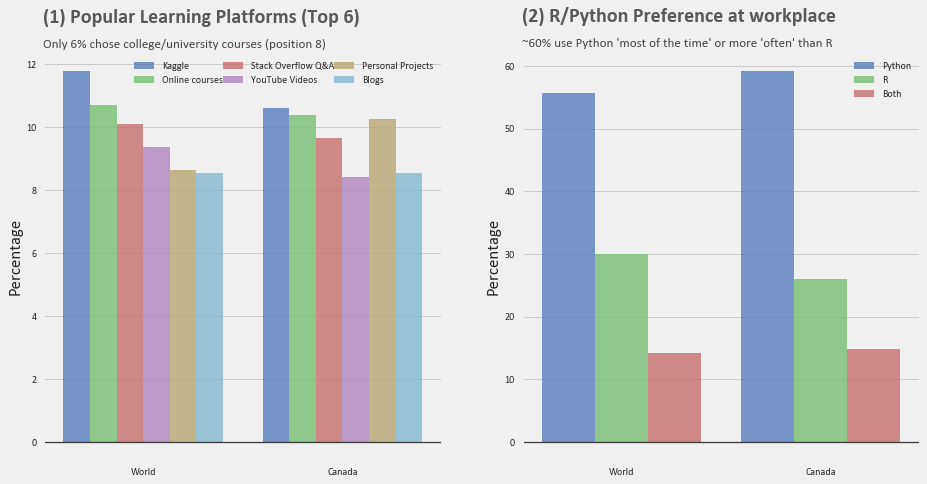

In [4]:
# PART 2A: Examine the following:
# (1) Most popular learning platforms
fig1 = plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
rowCount = 1
colCount = 2

# (1) Most popular learning platforms
learnPfsVals_world = allMCQData['LearningPlatformSelect'].str.split(',')
learnPfsArray_world = []
for response in learnPfsVals_world.dropna():
    learnPfsArray_world.extend(response)    
learnPfsArray_world = pd.Series(learnPfsArray_world)

learnPfsVals_canada = mcqDataCanada['LearningPlatformSelect'].str.split(',')
learnPfsArray_canada = []
for response in learnPfsVals_canada.dropna():
    learnPfsArray_canada.extend(response)    
learnPfsArray_canada = pd.Series(learnPfsArray_canada)

ax1 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,0), colspan=1)
learnPFsSummary = (learnPfsArray_world.value_counts()[0:6]*100/len(learnPfsArray_world)).append(learnPfsArray_canada.value_counts()[0:6]*100/len(learnPfsArray_canada))
learnPFsSummary = pd.DataFrame(learnPFsSummary).reset_index()
learnPFsSummary.columns = ['Learning Platform', 'Percentage']
learnPFsSummary['Area'] = ['World']*6 + ['Canada']*6
ax1 = sbr.barplot(data=learnPFsSummary,
                  x='Area',
                  y='Percentage',
                 hue='Learning Platform',
                 palette=palette,
                 alpha = alpha)
ax1.legend(loc='upper right', ncol=3, columnspacing=0.001)
ax1.set_ylabel('Percentage')
ax1.xaxis.label.set_visible(False)
ax1.text(x=-0.5,y=13.3,s='(1) Popular Learning Platforms (Top 6)',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax1.text(x=-0.5,y=12.5,s='Only 6% chose college/university courses (position 8)', fontsize = subHeaderFontSize, alpha = .85)
ax1.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)

# (3) Preference for R and Python
r_or_Py_World = allMCQData[(allMCQData['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) & 
                           (allMCQData['CodeWriter'] == 'Yes') &
                           (allMCQData['R_OR_PY'] != 'Neither')]['R_OR_PY']

r_or_Py_Can  = mcqDataCanada[(mcqDataCanada['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) & 
                             (mcqDataCanada['CodeWriter'] == 'Yes') &
                             (mcqDataCanada['R_OR_PY'] != 'Neither')]['R_OR_PY']

ax2 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,1), colspan=1)
r_or_PySummary = (r_or_Py_World.value_counts()*100/len(r_or_Py_World)).append(r_or_Py_Can.value_counts()*100/len(r_or_Py_Can))
r_or_PySummary = pd.DataFrame(r_or_PySummary).reset_index()
r_or_PySummary.columns = ['R/Python Preference', 'Percentage']
r_or_PySummary['Area'] = ['World']*3 + ['Canada']*3
ax2 = sbr.barplot(data=r_or_PySummary,
                  x='Area',
                  y='Percentage',
                  hue = 'R/Python Preference',
                  palette=palette,
                  alpha=alpha)
ax2.legend(loc='upper right')
ax2.set_ylabel('Percentage')
ax2.xaxis.label.set_visible(False)
ax2.text(x=-0.5,y=67,s='(2) R/Python Preference at workplace',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax2.text(x=-0.5,y=63,s='~60% use Python \'most of the time\' or more \'often\' than R', fontsize = subHeaderFontSize, alpha = .85)
ax2.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)

plt.show()
#fig1.savefig('C:\\SV_Projects\\KSurv\\toolsAndMethods-current.png')
fig1.savefig(outputFolderPath + 'toolsAndMethods-current-1.png')

##### Step 6: Examine the popularity of various machine learning algorithms among respondents.

C:\Users\clockwork\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


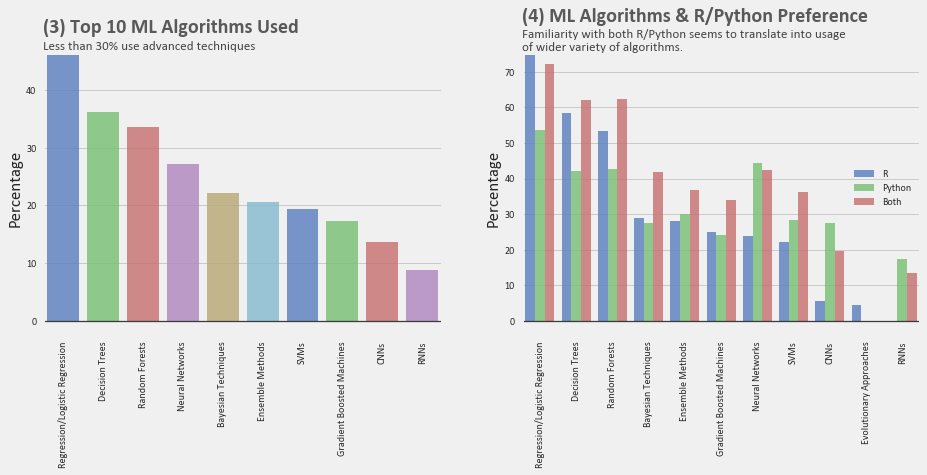

In [5]:
# PART 2B: Examine the following:
# (2) Current popular technologies/techniques/algorithms
fig2 = plt.figure(figsize=(14,7))
plt.style.use('fivethirtyeight')
plt.gcf().subplots_adjust(bottom=0.3)
rowCount = 1
colCount = 2

# (4) Top 10 ML Algorithms used - current (only for people currently employed and writing code)
MLAlgorithms_world = allMCQData[(allMCQData['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) & 
                           (allMCQData['CodeWriter'] == 'Yes')]['WorkAlgorithmsSelect'].str.split(',')
MLAlgorithmsArray_world = []
for response in MLAlgorithms_world.dropna():
    MLAlgorithmsArray_world.extend(response)    
MLAlgorithmsArray_world = pd.Series(MLAlgorithmsArray_world)
MLAlgorithms_summary = MLAlgorithmsArray_world.value_counts()*100/len(MLAlgorithms_world)

ax4 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,0), colspan=1)
ax4 = sbr.barplot(x=MLAlgorithms_summary[0:10].index, 
                  y=MLAlgorithms_summary[0:10].values,
                 palette=palette,
                 alpha = alpha)
ax4.legend(loc='upper right')
ax4.set_ylabel('Percentage')
ax4.xaxis.label.set_visible(False)
ax4.text(x=-0.5,y=50,s='(3) Top 10 ML Algorithms Used',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax4.text(x=-0.5,y=47,s='Less than 30% use advanced techniques', fontsize = subHeaderFontSize, alpha = .85)
ax4.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=90)

# 4b: examine algorithm usage for R/Python/Both users:
MLAlgorithms_world = allMCQData[allMCQData['WorkAlgorithmsSelect'] != 'Other'][['WorkAlgorithmsSelect', 'R_OR_PY']].dropna()
r_User_Algorithm_Usage = []
py_User_Algorithm_Usage = []
both_User_Algorithm_Usage = []

for index, row in MLAlgorithms_world.iterrows():
    if(row['R_OR_PY'] == 'R'):
        r_User_Algorithm_Usage.extend((row['WorkAlgorithmsSelect']).split(','))
    if(row['R_OR_PY'] == 'Python'):
        py_User_Algorithm_Usage.extend((row['WorkAlgorithmsSelect']).split(','))
    if(row['R_OR_PY'] == 'Both'):
        both_User_Algorithm_Usage.extend((row['WorkAlgorithmsSelect']).split(','))
        
r_User_Algorithm_Usage = pd.Series(r_User_Algorithm_Usage)
r_User_Algorithm_Usage = r_User_Algorithm_Usage[r_User_Algorithm_Usage != 'Other']
py_User_Algorithm_Usage = pd.Series(py_User_Algorithm_Usage)
py_User_Algorithm_Usage = py_User_Algorithm_Usage[py_User_Algorithm_Usage != 'Other']
both_User_Algorithm_Usage = pd.Series(both_User_Algorithm_Usage)
both_User_Algorithm_Usage = both_User_Algorithm_Usage[both_User_Algorithm_Usage != 'Other']

r_User_Algorithm_Summary = r_User_Algorithm_Usage.value_counts()*100/len(allMCQData[allMCQData['R_OR_PY'] == 'R'])
py_User_Algorithm_Summary = py_User_Algorithm_Usage.value_counts()*100/len(allMCQData[allMCQData['R_OR_PY'] == 'Python'])
both_User_Algorithm_Summary = both_User_Algorithm_Usage.value_counts()*100/len(allMCQData[allMCQData['R_OR_PY'] == 'Both'])
ax5 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,1), colspan=1)
algoUsageByRPyUsage = r_User_Algorithm_Summary[0:10].append(py_User_Algorithm_Summary[0:10]).append(both_User_Algorithm_Summary[0:10])
algoUsageByRPyUsage = pd.DataFrame(algoUsageByRPyUsage).reset_index()
algoUsageByRPyUsage.columns = ['Algorithm', 'Percentage']
algoUsageByRPyUsage['R/Python Preference'] = ['R']*10 + ['Python']*10 + ['Both']*10
ax5 = sbr.barplot(data=algoUsageByRPyUsage,
                  x='Algorithm',
                  y='Percentage',
                  hue = 'R/Python Preference',
                  palette=palette,
                  alpha=alpha,
                 )
ax5.legend(loc='center right')
ax5.set_ylabel('Percentage')
ax5.xaxis.label.set_visible(False)
ax5.text(x=-0.5,y=84,s='(4) ML Algorithms & R/Python Preference',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax5.text(x=-0.5,y=76,s='Familiarity with both R/Python seems to translate into usage\nof wider variety of algorithms.', fontsize = subHeaderFontSize, alpha = .85)
ax5.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90)

plt.show()
fig2.savefig(outputFolderPath + 'toolsAndMethods-current-2.png')


##### Step 7: Find out what ML tools and algorithms people are most excited to learn in the coming year.

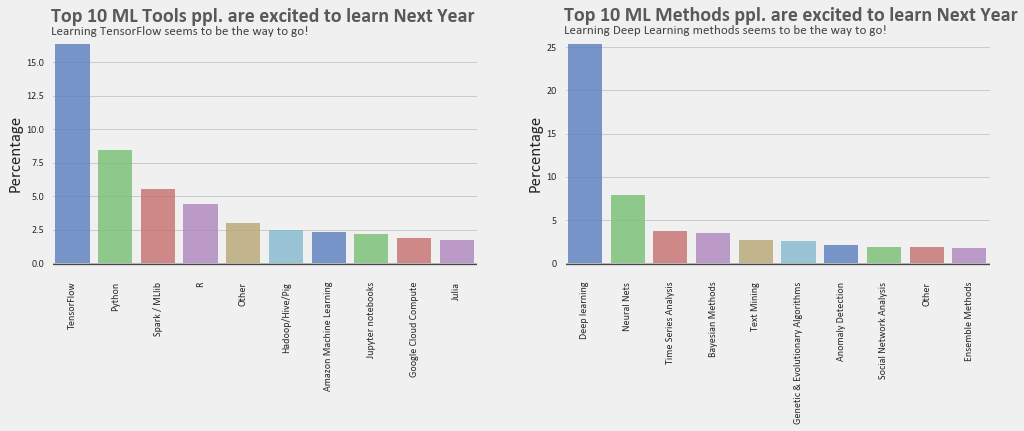

In [6]:
# PART 3A: Examine the following:
# (1) Most popular tools for next year
fig3 = plt.figure(figsize=(15,7))
plt.style.use('fivethirtyeight')
plt.gcf().subplots_adjust(bottom=0.4)
rowCount = 1
colCount = 2

# (1): Examine most popular machine learning tools that people want to learn in the coming year
# We only want to look at people who are currently employed and write code at work
MLTools_NXT_Yr_summary = allMCQData[(allMCQData['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) & 
                           (allMCQData['CodeWriter'] == 'Yes') &
                            (allMCQData['MLToolNextYearSelect'] != 'I don\'t plan on learning a new tool/technology')]['MLToolNextYearSelect']
MLTools_NXT_Yr_summary = MLTools_NXT_Yr_summary.value_counts()*100/(len(MLTools_NXT_Yr_summary))
ax1 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,0), colspan=1)
ax1 = sbr.barplot(x=MLTools_NXT_Yr_summary[0:10].index, 
                  y=MLTools_NXT_Yr_summary[0:10].values,
                 palette=palette,
                 alpha = alpha)
ax1.legend(loc='upper right')
ax1.set_ylabel('Percentage')
ax1.xaxis.label.set_visible(False)
ax1.text(x=-0.5,y=18,s='Top 10 ML Tools ppl. are excited to learn Next Year',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax1.text(x=-0.5,y=17,s='Learning TensorFlow seems to be the way to go!', fontsize = subHeaderFontSize, alpha = .85)
ax1.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# (1): Examine most popular machine learning tools that people want to learn in the coming year
# We only want to look at people who are currently employed and write code at work
MLMethods_NXT_Yr_summary = allMCQData[(allMCQData['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) & 
                           (allMCQData['CodeWriter'] == 'Yes')]['MLMethodNextYearSelect'].replace(to_replace='Ensemble Methods (e.g. boosting, bagging)',
                                                                                                 value = 'Ensemble Methods')
MLMethods_NXT_Yr_summary = MLMethods_NXT_Yr_summary.value_counts()*100/(len(MLMethods_NXT_Yr_summary))
ax2 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,1), colspan=1)
ax2 = sbr.barplot(x=MLMethods_NXT_Yr_summary[0:10].index, 
                  y=MLMethods_NXT_Yr_summary[0:10].values,
                 palette=palette,
                 alpha = alpha)
ax2.legend(loc='upper right')
ax2.set_ylabel('Percentage')
ax2.xaxis.label.set_visible(False)
ax2.text(x=-0.5,y=28,s='Top 10 ML Methods ppl. are excited to learn Next Year',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax2.text(x=-0.5,y=26.5,s='Learning Deep Learning methods seems to be the way to go!', fontsize = subHeaderFontSize, alpha = .85)
ax2.axhline(y=-0.01, color = 'black', linewidth = 1.3, alpha = 0.7)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()
fig3.savefig(outputFolderPath + 'toolsAndMethods-future.png')

##### Step 8: Examine the factors that affect the compensation amounts for Canadian Respondents only.

In [7]:
# PART 4: perform a regression analysis on the Salary amounts for Canadian respondents
# who are currenly employed and earn compensation in CAD or USD.

# (1) Convert CompensationAmount to a Float value and set in a new variable
allMCQData['CompensationAmount_NUM'] = allMCQData['CompensationAmount']
allMCQData['CompensationAmount_NUM'] = allMCQData['CompensationAmount_NUM'].apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))

# (2) Apply filters mentioned earlier and also remove outliers: there are some possibly fake salary 
# amounts in multi millions of dollars.
salaryData = allMCQData[(allMCQData['EmploymentStatus'].isin(['Employed full-time',
                                                'Employed part-time', 
                                                'Independent contractor, freelancer, or self-employed'])) &
                        (allMCQData['Country'].isin(['Canada'])) &
                                (allMCQData['CompensationAmount_NUM'] > 5000) &
                                 (allMCQData['CompensationAmount_NUM'] < 1000000) &
                                   (allMCQData['CompensationCurrency'].isin(['USD', 'CAD']))]

# (3) Convert USD amounts to CAD
salaryData['CompensationAmount_NUM'] = np.where(salaryData['CompensationCurrency'] =='USD',
                                               salaryData['CompensationAmount_NUM']/0.823688,
                                               salaryData['CompensationAmount_NUM'])

# (4) Convert FormalEducation_MOD into an ordinal categorical variable and bin age values
salaryData['FormalEducation_Mod'].replace(to_replace = ['Master\'s degree',
                                                'Bachelor\'s degree',
                                                'Doctoral degree',
                                                'No Bachelor\'s',
                                                'Professional degree',
                                                'High School',
                                                'No Answer'],
                               value=[5,4,6,3,2,1,0],
                                         inplace=True)
salaryData['FormalEducation_Mod'] = pd.to_numeric(salaryData['FormalEducation_Mod'])

# (5) Categorize the Age variable into reasonably spaced bins
salaryData['Age'] = pd.cut(salaryData['Age'],bins=[0,20,30,40,50,60,80], include_lowest=True, 
                           labels=['LT_20', '20_29', '30_39', '40_49', '50_59', '60_80'])

# (6) Since there are very few non-males compared to males, set Female and Other to NOT_MALE in
# a single category
salaryData['Gender'].replace(to_replace=['Female', 'Other'],
                            value=['NOT_MALE', 'NOT_MALE'],
                            inplace=True)

# (7) Set CurrentJobTitle as 'Other' when its not 'Data Scientiest' or 'MAchine Learning Engineer'
salaryData['CurrentJobTitleSelect'] = np.where(salaryData['CurrentJobTitleSelect'].isin(
                                                ['Data Scientist', 'Machine Learning Engineer']),
                                              salaryData['CurrentJobTitleSelect'],
                                              'Other')

# (8) Add 3 new columns: counts of Algorithms used, Skills used, ML methods used
salaryData['AlgorithmUseCount'] = 0
salaryData['SkillCount'] = 0
salaryData['MethodUseCount'] = 0
salaryData['LearningPlatformCount'] = 0

for index, row in salaryData.iterrows():
    # Set AlgorithmUseCount = count of frequently used algorithms
    if(pd.isnull(row['WorkAlgorithmsSelect'])):
        algoCount = 0
    else:
        algoCount = len(row['WorkAlgorithmsSelect'].split(','));
    salaryData.set_value(index, 'AlgorithmUseCount', algoCount)
    
    # Set MEthodsUseCount = count of frequently used methods
    if(pd.isnull(row['WorkMethodsSelect'])):
        methodCount = 0
    else:
        methodCount = len(row['WorkMethodsSelect'].split(','));
    salaryData.set_value(index, 'MethodUseCount', methodCount)
    
    # Set SkillsCount = count of frequently used methods
    if(pd.isnull(row['MLSkillsSelect'])):
        methodCount = 0
    else:
        methodCount = len(row['MLSkillsSelect'].split(','));
    salaryData.set_value(index, 'SkillCount', methodCount)
    
    # Set LearningPlatformCount = count of LearningPlatforms used
    if(pd.isnull(row['LearningPlatformSelect'])):
        lpCount = 0
    else:
        lpCount = len(row['LearningPlatformSelect'].split(','));
    salaryData.set_value(index, 'LearningPlatformCount', lpCount)

# (9) Make a list of all of the categorial features that we want to feed into the model.
categoricalFeatures = ['Gender',
                      'Age',
                      'MajorSelected_Mod',
                      'ParentsEducation',
                      'CurrentJobTitleSelect',
                      'CurrentEmployerType',
                      'JobFunctionSelect',
                       'WorkMLTeamSeatSelect',
                      'Tenure',
                      'EmployerIndustry',
                      'EmployerSize',
                       'AlgorithmUnderstandingLevel'
                      ]

salaryData_predictors = salaryData[categoricalFeatures]
#salaryData_predictors.fillna(0, inplace=True)

# (10) Create dummy columns for each level of all categorical variables
salaryData_predictors = pd.get_dummies(salaryData_predictors)

# (11) Add in the remaining non-categorical features
salaryData_predictors = salaryData_predictors.join(salaryData[['AlgorithmUseCount', 
                                                               'MethodUseCount',
                                                               'SkillCount',
                                                               'LearningPlatformCount',
                                                               'LearningCategorySelftTaught',
                                                                'LearningCategoryOnlineCourses',
                                                                'LearningCategoryWork',
                                                                'LearningCategoryUniversity',
                                                                'LearningCategoryKaggle',
                                                             'FormalEducation_Mod',
                                                            'PythonUsageLevel',
                                                               'RUsageLevel'
                                                            ]])
salaryData_predictors.fillna(0, inplace=True)

# (12) Fit an OLS model
model = sm.OLS(salaryData['CompensationAmount_NUM'], sm.add_constant(salaryData_predictors)).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     CompensationAmount_NUM   R-squared:                       0.971
Model:                                OLS   Adj. R-squared:                  0.750
Method:                     Least Squares   F-statistic:                     4.399
Date:                    Wed, 06 Dec 2017   Prob (F-statistic):            0.00234
Time:                            22:51:07   Log-Likelihood:                -1170.0
No. Observations:                     112   AIC:                             2538.
Df Residuals:                          13   BIC:                             2807.
Df Model:                              98                                         
Covariance Type:                nonrobust                                         
========================================================================================================================================================================================================================================================================
                                                                                                                                                                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                                                                                                                 1.453e+05   6.68e+04      2.175      0.049     984.951     2.9e+05
Gender_Male                                                                                                                                                                                           6.207e+04   3.67e+04      1.694      0.114   -1.71e+04    1.41e+05
Gender_NOT_MALE                                                                                                                                                                                       8.327e+04   3.28e+04      2.539      0.025    1.24e+04    1.54e+05
Age_LT_20                                                                                                                                                                                             1.033e-09   1.36e-08      0.076      0.941   -2.83e-08    3.04e-08
Age_20_29                                                                                                                                                                                             1.549e+04   2.27e+04      0.682      0.507   -3.36e+04    6.46e+04
Age_30_39                                                                                                                                                                                             2.918e+04   2.58e+04      1.132      0.278   -2.65e+04    8.49e+04
Age_40_49                                                                                                                                                                                             7.319e+04   2.39e+04      3.066      0.009    2.16e+04    1.25e+05
Age_50_59                                                                                                                                                                                             5.399e+04   2.43e+04      2.222      0.045    1499.282    1.06e+05
Age_60_80                                                                                                                   

##### Step 8A: Plot regression results.

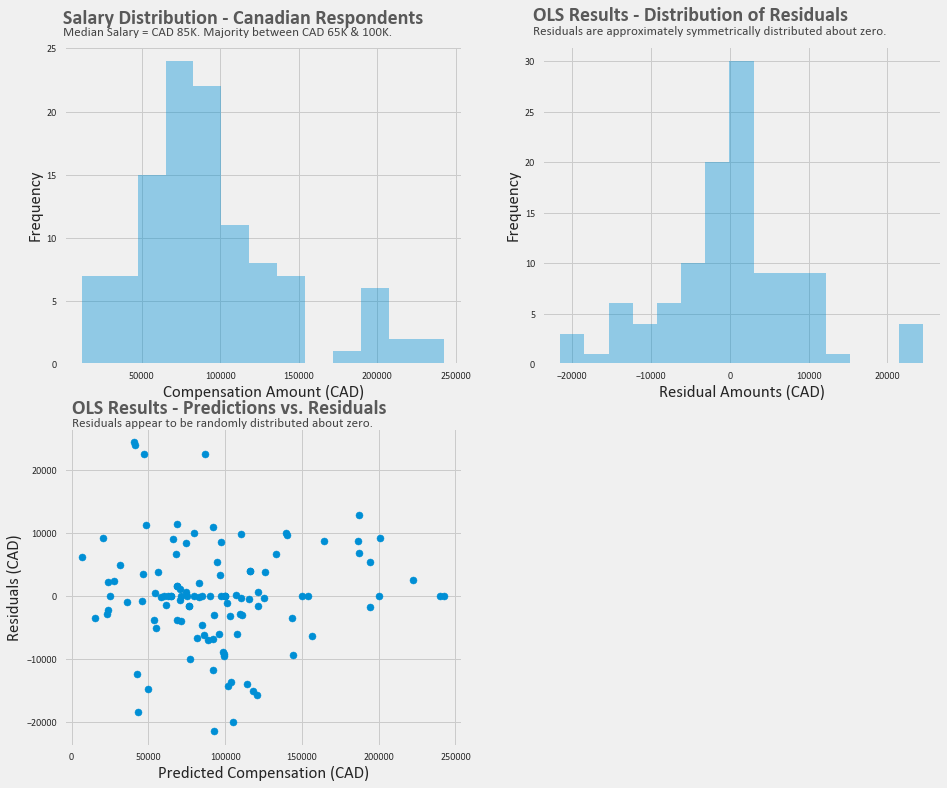

In [8]:
## Part 4B: make a few plots on the salary regression analysis
fig4 = plt.figure(figsize=(14,12))
plt.style.use('fivethirtyeight')
#plt.gcf().subplots_adjust(top=0.9)
rowCount = 2
colCount = 2

# First examine the distribution of salaries for Canadian respondents
ax1 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,0), colspan=1, rowspan=1)
ax1 = sbr.distplot(salaryData['CompensationAmount_NUM'], kde=False)
ax1.text(x=0,y=27,s='Salary Distribution - Canadian Respondents',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax1.text(x=0,y=26,s='Median Salary = CAD 85K. Majority between CAD 65K & 100K.', fontsize = subHeaderFontSize, alpha = .85)
ax1.set_xlabel('Compensation Amount (CAD)')
ax1.set_ylabel('Frequency')

# Then examine the distribution of the residuals or difference between actual and predicted values
ax2 = plt.subplot2grid(shape=(rowCount, colCount), loc=(0,1), colspan=1, rowspan=1)
ax2 = sbr.distplot(model.resid, kde=False)
ax2.text(x=-25000,y=34,s='OLS Results - Distribution of Residuals',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax2.text(x=-25000,y=32.6,s='Residuals are approximately symmetrically distributed about zero.', fontsize = subHeaderFontSize, alpha = .85)
ax2.set_xlabel('Residual Amounts (CAD)')
ax2.set_ylabel('Frequency')

ax3 = plt.subplot2grid(shape=(rowCount, colCount), loc=(1,0), colspan=1, rowspan=1, )
ax3 = plt.scatter(y=model.resid, x=model.fittedvalues)
ax3.axes.text(x=0,y=29000,s='OLS Results - Predictions vs. Residuals',fontsize = headerFontSize, weight = 'bold', alpha = .75)
ax3.axes.text(x=0,y=27000,s='Residuals appear to be randomly distributed about zero.', fontsize = subHeaderFontSize, alpha = .85)
ax3.axes.xaxis.set_label_text('Predicted Compensation (CAD)')
ax3.axes.yaxis.set_label_text('Residuals (CAD)')


plt.show()
fig4.savefig(outputFolderPath + 'olsResults.png')


##### Step 8B: Draw inferences from the OLS results about the factors that affect compensation amounts for Canadian respondents.

In [9]:
# Finally, extract the features and their associated p-values and coefficients
# if the pValue is less than 0.1 i.e. 90% confidence 
featureSummary = pd.concat([model.pvalues, model.params], axis = 1)
featureSummary = featureSummary.reset_index()
featureSummary.columns = ['feature', 'pValue', 'coeff']

# Let's look at features that have a positive or negative impact on the compensation amount 
# at 90% confidence (pValue < 0.1)
print featureSummary[featureSummary['pValue']<0.1]

                                               feature    pValue  \
0                                                const  0.048669   
2                                      Gender_NOT_MALE  0.024684   
6                                            Age_40_49  0.009012   
7                                            Age_50_59  0.044648   
11                       MajorSelected_Mod_Elec. Engg.  0.089316   
12               MajorSelected_Mod_Engg.(non-CompSci.)  0.005562   
17                             MajorSelected_Mod_Other  0.065526   
18                           MajorSelected_Mod_Physics  0.009332   
22                ParentsEducation_A bachelor's degree  0.094600   
25              ParentsEducation_A professional degree  0.073980   
29   ParentsEducation_Some college/university study...  0.096208   
30                CurrentJobTitleSelect_Data Scientist  0.022396   
34   CurrentEmployerType_Employed by a company that...  0.002777   
35   CurrentEmployerType_Employed by a company t